# Importing all the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Reading the CSV data file

In [2]:
data = pd.read_csv("/content/Aerofit_treadmill.csv")

# Getting the first 5 rows of the data using .head()

In [3]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


# Getting the number of rows and columns in the data

In [4]:
data.shape

(180, 9)

# Getting the count of data points we have for each Product type using value_counts()

In [5]:
data["Product"].value_counts()

,count
Product,
KP281,80
KP481,60
KP781,40


# Getting the Non null count and the data types for all the columns in the data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


# Getting the statistical values for the numerical columns in the data

In [7]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**Just from the .describe() function we will be able to detect where the possible outliers could be**

**By the differece between the mean and the median in each column we can know if there are ouliers or not**

**If the differance is high, it means that there are possible outliers**

**In this Aerofit dataset according to the above statistical values - Income and Miles columns can have the possible outliers**

# Checking if there are any Null values in the data

In [8]:
data.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


In [9]:
data.isnull().sum() / len(data)

,0
Product,0.0
Age,0.0
Gender,0.0
Education,0.0
MaritalStatus,0.0
Usage,0.0
Fitness,0.0
Income,0.0
Miles,0.0


**From the above it is clear that there are no null values in the data**

# Using the Box plot on the "Gender" and "Income" columns to see if there are any possible outliers in the data

<Axes: xlabel='Gender', ylabel='Income'>

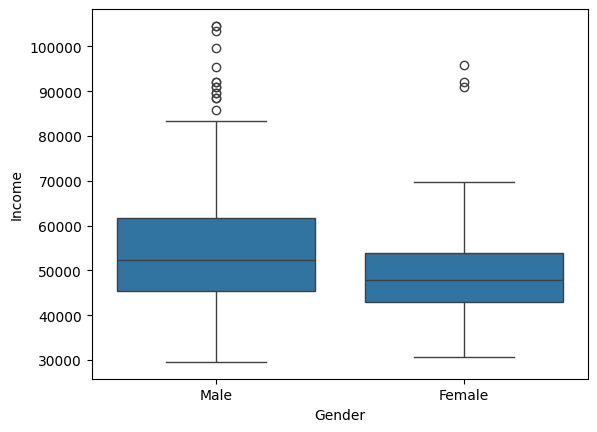

In [10]:
sns.boxplot(x = data["Gender"] , y = data["Income"])

# Using the Box plot on the "Gender" and "Miles" columns to see if there are any possible outliers in the data

<Axes: xlabel='Gender', ylabel='Miles'>

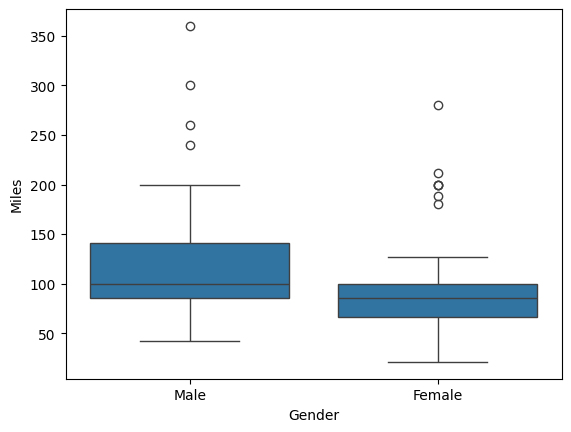

In [11]:
sns.boxplot(x = data["Gender"] , y = data["Miles"])

**As there are only less number of data points skipping the removal of outluiers for this business case**

# Using the box plot on the "Gender" and "Income" columns with hue parameter applied to "Product" column

<Axes: xlabel='Gender', ylabel='Income'>

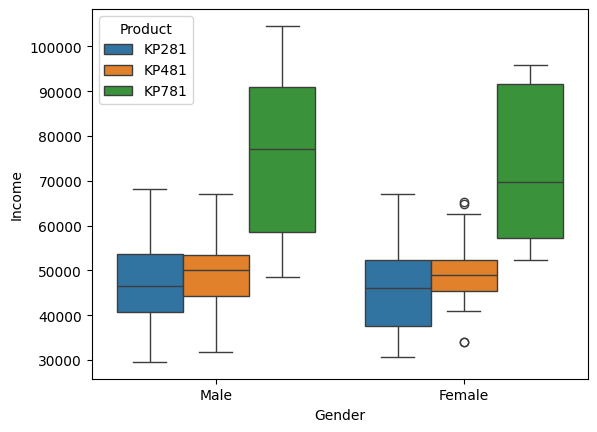

In [12]:
sns.boxplot(x = data["Gender"] , y = data["Income"] , hue = data["Product"])

**From the above it is clearly visible that people who are having high income tend to buy the "KP781" product**

# Using the box plot on the "Gender" and "Miles" columns with hue parameter applied to "Product" column

<Axes: xlabel='Gender', ylabel='Miles'>

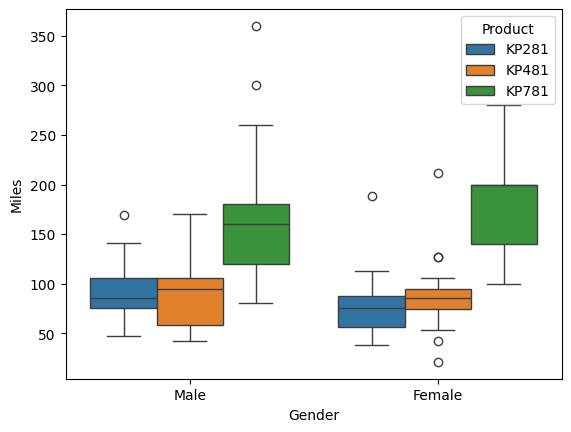

In [13]:
sns.boxplot(x = data["Gender"] , y = data["Miles"] , hue = data["Product"])

**From the above it is clearly visible that people who tend to walk/run more likely to buy the "KP781" Product.**

# Using the box plot on the "Gender" and "Fitness" columns with hue parameter applied to "Product" column

<Axes: xlabel='Gender', ylabel='Fitness'>

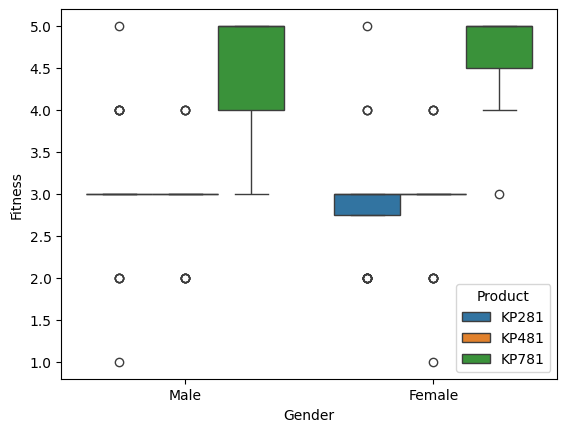

In [14]:
sns.boxplot(x = data["Gender"] , y = data["Fitness"] , hue = data["Product"])

**From the above it is clearly visible that the people who rated themselves highly fit are more likely to buy the "KP781" product.**

# Using the box plot on the "Gender" and "Usage" columns with hue parameter applied to "Product" column

<Axes: xlabel='Gender', ylabel='Usage'>

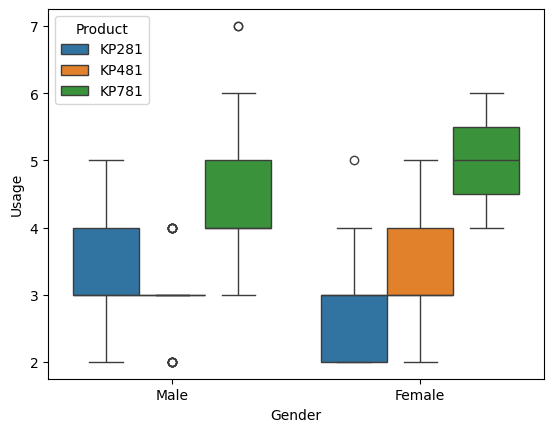

In [15]:
sns.boxplot(x = data["Gender"] , y = data["Usage"] , hue = data["Product"])

**From the above it is clearly visible that people who are planning to use the equipment more often are likely to buy the "KP781" Product**

# Using heatmap to get the correlation between all the numerical metrics in the data

<Axes: >

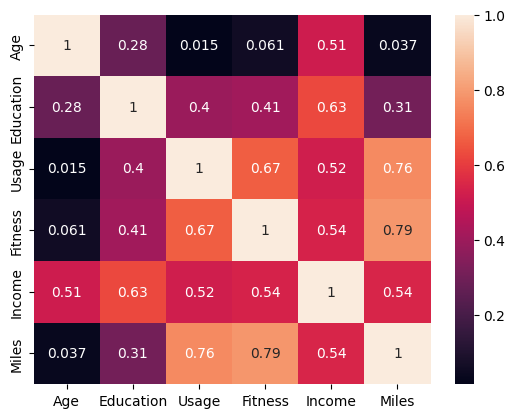

In [16]:
sns.heatmap(data.select_dtypes(include = ["number"]).corr() , annot = True)

**Insights from the above**

**1. Fitness and Miles are having high correlation (People who tend to be more fit are more likely to walk/run more)**

**2. Usage and Miles are having high correlation (People who tend to walk/run more are more likely to use the fitness equipments**

**3. Income and Education are having high correlation (People who study more are more likely to recwive high income**

**4. Usage, Fitness, Miles with Age is having very low correlation**


# Starting off with the Statistical Data analysis with "Gender" and "Product" types

**Using .crosstab() with "Gender" as the index and "Product" as the columns**

In [17]:
pd.crosstab(index = data["Gender"] , columns = data["Product"])

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


**Using .crosstab() with "Gender" as the index and "Product" as the columns and margins parameter as True**

In [18]:
pd.crosstab(index = data["Gender"] , columns = data["Product"] , margins = True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


**Marginal Probabilities**

Probability of buying "KP281" - 80 / 180 = 0.44 (44%)

Probability of buying "KP481" - 60 / 180 = 0.33 (33%)

Probability of buying "KP781" - 40 / 180 = 0.22 (22%)

**Joint Probabilities**

Probability of women buying "KP281" - 40 / 180 = 0.22 (22%)

Probability of women buying "KP481" - 29 / 180 = 0.16 (16%)

Probability of women buying "KP781" - 7 / 180 = 0.038 (3.8%)

Probability of men buying "KP281" - 40 / 180 = 0.22 (22%)

Probability of men buying "KP481" - 31 / 180 = 0.17 (17%)

Probability of men buying "KP781" - 33 / 180 = 0.18 (18%)

**Using .crosstab() with "Gender" as the index and "Product" as the columns and margins parameter as True, normalize as "index"**

In [19]:
pd.crosstab(index = data["Gender"] , columns = data["Product"] , margins = True , normalize = "index").round(2)

Product,KP281,KP481,KP781
Gender,,,
Female,0.53,0.38,0.09
Male,0.38,0.30,0.32
All,0.44,0.33,0.22


**Conditional probabilities**

Probability of buying "KP281" given it is women - P(buy KP281 | women) = 40 / 76 = 53%

Probability of buying "KP481" given it is women - P(buy KP481 | women) = 29 / 76 = 38%

Probability of buying "KP781" given it is women - P(buy KP781 | women) = 7 / 76 = 9%

Probability of buying "KP281" given it is men - P(buy KP281 | men) = 40 / 104 = 38%

Probability of buying "KP481" given it is men - P(buy KP481 | men) = 31 / 104 = 30%

Probability of buying "KP781" given it is men - P(buy KP781 | men) = 33 / 104 = 32%

**Using .crosstab() with "Gender" as the index and "Product" as the columns and margins parameter as True, normalize as "columns"**

In [20]:
pd.crosstab(index = data["Gender"] , columns = data["Product"] , margins = True , normalize = "columns").round(2)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.5,0.48,0.18,0.42
Male,0.5,0.52,0.82,0.58


**Conditional probabilities**

Probability of women buying given it is "KP281" - P(women buy | KP281) - 40 / 80 = 50%

Probability of women buying given it is "KP481" - P(women buy | KP481) - 29 / 60 = 48%

Probability of women buying given it is "KP781" - P(women buy | KP781) - 7 / 40 = 18%

Probability of men buying given it is "KP281" - P(men buy | KP281) - 40 / 80 = 50%

Probability of men buying given it is "KP481" - P(men buy | KP481) - 31 / 60 = 52%

Probability of men buying given it is "KP781" - P(men buy | KP781) - 33 / 40 = 82%

# Continuing the statistical analysis with "Marital status" and "Product" types

**Using .crosstab() with "Marital Status" as the index and "Product" as the columns and margins parameter as True**

In [21]:
pd.crosstab(index = data["MaritalStatus"] , columns = data["Product"] , margins = True)

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,48,36,23,107
Single,32,24,17,73
All,80,60,40,180


**Joint probabilities**

Probability of "partenered people" buying "KP281" - 48 / 180 = 27%

Probability of "partenered people" buying "KP481" - 36 / 180 = 20%

Probability of "partenered people" buying "KP781" - 23 / 180 = 12.8%

Probability of "Single people" buying "KP281" - 32 / 180 = 18%

Probability of "Single people" buying "KP481" - 24 / 180 = 13%

Probability of "Single people" buying "KP781" - 17 / 180 = 9%

**Using .crosstab() with "Marital Status" as the index and "Product" as the columns and margins parameter as True, normalize as "index"**

In [22]:
pd.crosstab(index = data["MaritalStatus"] , columns = data["Product"] , margins = True)

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,48,36,23,107
Single,32,24,17,73
All,80,60,40,180


In [23]:
pd.crosstab(index = data["MaritalStatus"] , columns = data["Product"] , margins = True , normalize = "index").round(2)

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.45,0.34,0.21
Single,0.44,0.33,0.23
All,0.44,0.33,0.22


**Conditional probabilities**

Probability of buying "KP281" given "Partenered"- p(KP281 | Partenered) = 48 / 107 = 45%

Probability of buying "KP481" given "Partenered"- p(KP481 | Partenered) = 36 / 107 = 34%

Probability of buying "KP781" given "Partenered"- p(KP781 | Partenered) = 23 / 107 = 21%

Probability of buying "KP281" given "Single"- p(KP281 | Single) = 32 / 73 = 44%

Probability of buying "KP481" given "Single"- p(KP481 | Single) = 24 / 73 = 33%

Probability of buying "KP781" given "Single"- p(KP781 | Single) = 23 / 107 = 23%

**Using .crosstab() with "Marital Status" as the index and "Product" as the columns and margins parameter as True, normalize as "columns"**

In [24]:
pd.crosstab(index = data["MaritalStatus"] , columns = data["Product"] , margins = True)

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,48,36,23,107
Single,32,24,17,73
All,80,60,40,180


In [25]:
pd.crosstab(index = data["MaritalStatus"] , columns = data["Product"] , margins = True , normalize = "columns").round(2)

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,0.6,0.6,0.57,0.59
Single,0.4,0.4,0.42,0.41


**Conditional probabilities**

Probability of "Partenered" buying given it is "KP281" - P(Partenered buy| KP281) = 48 / 80 = 60%

Probability of "Partenered" buying given it is "KP481" - P(Partenered buy | KP481) = 36 / 60 = 60%

Probability of "Partenered" buying given it is "KP781" - P(Partenered buy | KP781) = 23 / 40 = 57%

Probability of "Singles" buying given it is "KP281" - P(Singles buy| KP281) = 32 / 80 = 40%

Probability of "Singles" buying given it is "KP481" - P(Singles buy | KP481) = 24 / 60 = 40%

Probability of "Singles" buying given it is "KP781" - P(Singles buy | KP781) = 17 / 40 = 42%

# Continuing the statistical analysis with "Fitness" and "Product" types

**Using .crosstab() with "Fitness" as the index and "Product" as the columns and margins parameter as True**

In [27]:
pd.crosstab(index = data["Fitness"] , columns = data["Product"] , margins = True)

Product,KP281,KP481,KP781,All
Fitness,,,,
1,1,1,0,2
2,14,12,0,26
3,54,39,4,97
4,9,8,7,24
5,2,0,29,31
All,80,60,40,180


In [28]:
pd.crosstab(index = data["Fitness"] , columns = data["Product"] , margins = True , normalize = "index").round(2)

Product,KP281,KP481,KP781
Fitness,,,
1,0.50,0.50,0.00
2,0.54,0.46,0.00
3,0.56,0.40,0.04
4,0.38,0.33,0.29
5,0.06,0.00,0.94
All,0.44,0.33,0.22


**Conditional probabilities**

Probability of "KP281" given the fitness rating is "1" - P(buy KP281 | Fitness is 1) = 1 / 2 = 50%

Probability of "KP481" given the fitness rating is "1" - P(buy KP481 | Fitness is 1) = 1 / 2 = 50%

Probability of "KP781" given the fitness rating is "1" - P(buy KP781 | Fitness is 1) = 0 / 2 = 0%

Probability of "KP281" given the fitness rating is "2" - P(buy KP281 | Fitness is 2) = 14 / 26 = 54%

Probability of "KP481" given the fitness rating is "2" - P(buy KP481 | Fitness is 2) = 12 / 26 = 46%

Probability of "KP781" given the fitness rating is "2" - P(buy KP781 | Fitness is 2) = 0 / 26 = 0%

Probability of "KP281" given the fitness rating is "3" - P(buy KP281 | Fitness is 3) = 54 / 97 = 56%

Probability of "KP481" given the fitness rating is "3" - P(buy KP481 | Fitness is 3) = 39 / 97 = 40%

Probability of "KP781" given the fitness rating is "3" - P(buy KP781 | Fitness is 3) = 4 / 97 = 4%

Probability of "KP281" given the fitness rating is "4" - P(buy KP281 | Fitness is 4) = 9 / 24 = 38%

Probability of "KP481" given the fitness rating is "4" - P(buy KP481 | Fitness is 4) = 8 / 24 = 33%

Probability of "KP781" given the fitness rating is "4" - P(buy KP781 | Fitness is 4) = 7 / 24 = 29%

Probability of "KP281" given the fitness rating is "5" - P(buy KP281 | Fitness is 5) = 2 / 31 = 6.45%

Probability of "KP481" given the fitness rating is "5" - P(buy KP481 | Fitness is 5) = 0 / 31 = 0%

Probability of "KP781" given the fitness rating is "5" - P(buy KP781 | Fitness is 5) = 29 / 31 = 94%

**Recommendations**

1. The probability of customers who rated themselves with low fitness score buying "KP781" is moslty 0 - To improve this please share the key features and easeness of using this equipment. Make sure the customers understand the importance of doing the workout with "KP781" so they can improve their fitness. Also may be provide them some extra warranty on this product if needed for this customer categories.

2. The probability of customers who rated themselves highly fit buying the "KP781" is very high. Make sure these customers do not skip buying the products. Also make sure to get some leads from these customers (like their friends, colleagues and workout spaces) who might be looking to buy the fitness equipments.

3. The probability of Singles buying the products is less than the Partnered people. The reason might be they are youngsters who are still in the college or starting their carrier. To increase the sales of products with Singles, try to give certain discounts (student discounts for example).

4. The probability women buying the product "KP781" is very less compared to Men. The reason might be that the women think this product is not women friendly to use. Make sure to run campaigns explaing how "KP781" is easy to use for women and it is built making sure both Men and Women have a great workout experience using this product.